### Tasks
0. unifying code: data loading, data structures, imports, 

 - 0.1. Add a quick EDA section before the viz tasks

1. make the pie plot about num of keypoints and num of images / annotations for each dataset like the following:

2.  animal / image size analysis on each bird dataset (histogram). Like this below

3. keypoints vs. bounding box analysis (how many boxes look unusual? how many keypoints are occluded vs. not occluded? Try to make histogram and nice analysis)

4. visualize the keypoints and bounding box on 10 images from each bird dataset

5. Run a k-means clustering to detect outliers and visualize outliers vs. centroid keypoints

### TODOs
- methods => into scripts
    - data loading scripts: data.py
    - visualisation/plotting scripts: visualisation.py
    - stats script: stats.py
    - utilities script: utils.py

In [33]:
# imports
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from src.data import *
from src.calcs import *
from src.utils import *
from src.visualisation import *

In [13]:
# data loading
root = "/home/dikra/media/dikra/PhD/DATA/DLC24_Data/tiny_all_bird_merged_coco"
images = f"{root}/images"
annotations = f"{root}/annotations"
train_file = f"{annotations}/train.json"
test_file = f"{annotations}/test.json"

train_data = load_data(train_file)
test_data = load_data(test_file)

# EDA: Exploratory Data Analysis 
Print number of labeled images, #of annotated keypoints, labels of bodyparts,... 

# Task1

In [14]:
train_annotations_by_dataset, train_keypoints_by_dataset = count_keypoints_annotations(train_data)
train_annotations_by_dataset, train_keypoints_by_dataset

({'cowbird': 214, 'CUB_200_2011': 100, 'tiny_nabirds': 100},
 {'cowbird': 1951, 'CUB_200_2011': 1108, 'tiny_nabirds': 748})

In [15]:
# Prepare data for pie charts
train_keypoints_labels = list(train_keypoints_by_dataset.keys())
train_keypoints_sizes = list(train_keypoints_by_dataset.values())

train_annotations_labels = list(train_annotations_by_dataset.keys())
train_annotations_sizes = list(train_annotations_by_dataset.values())

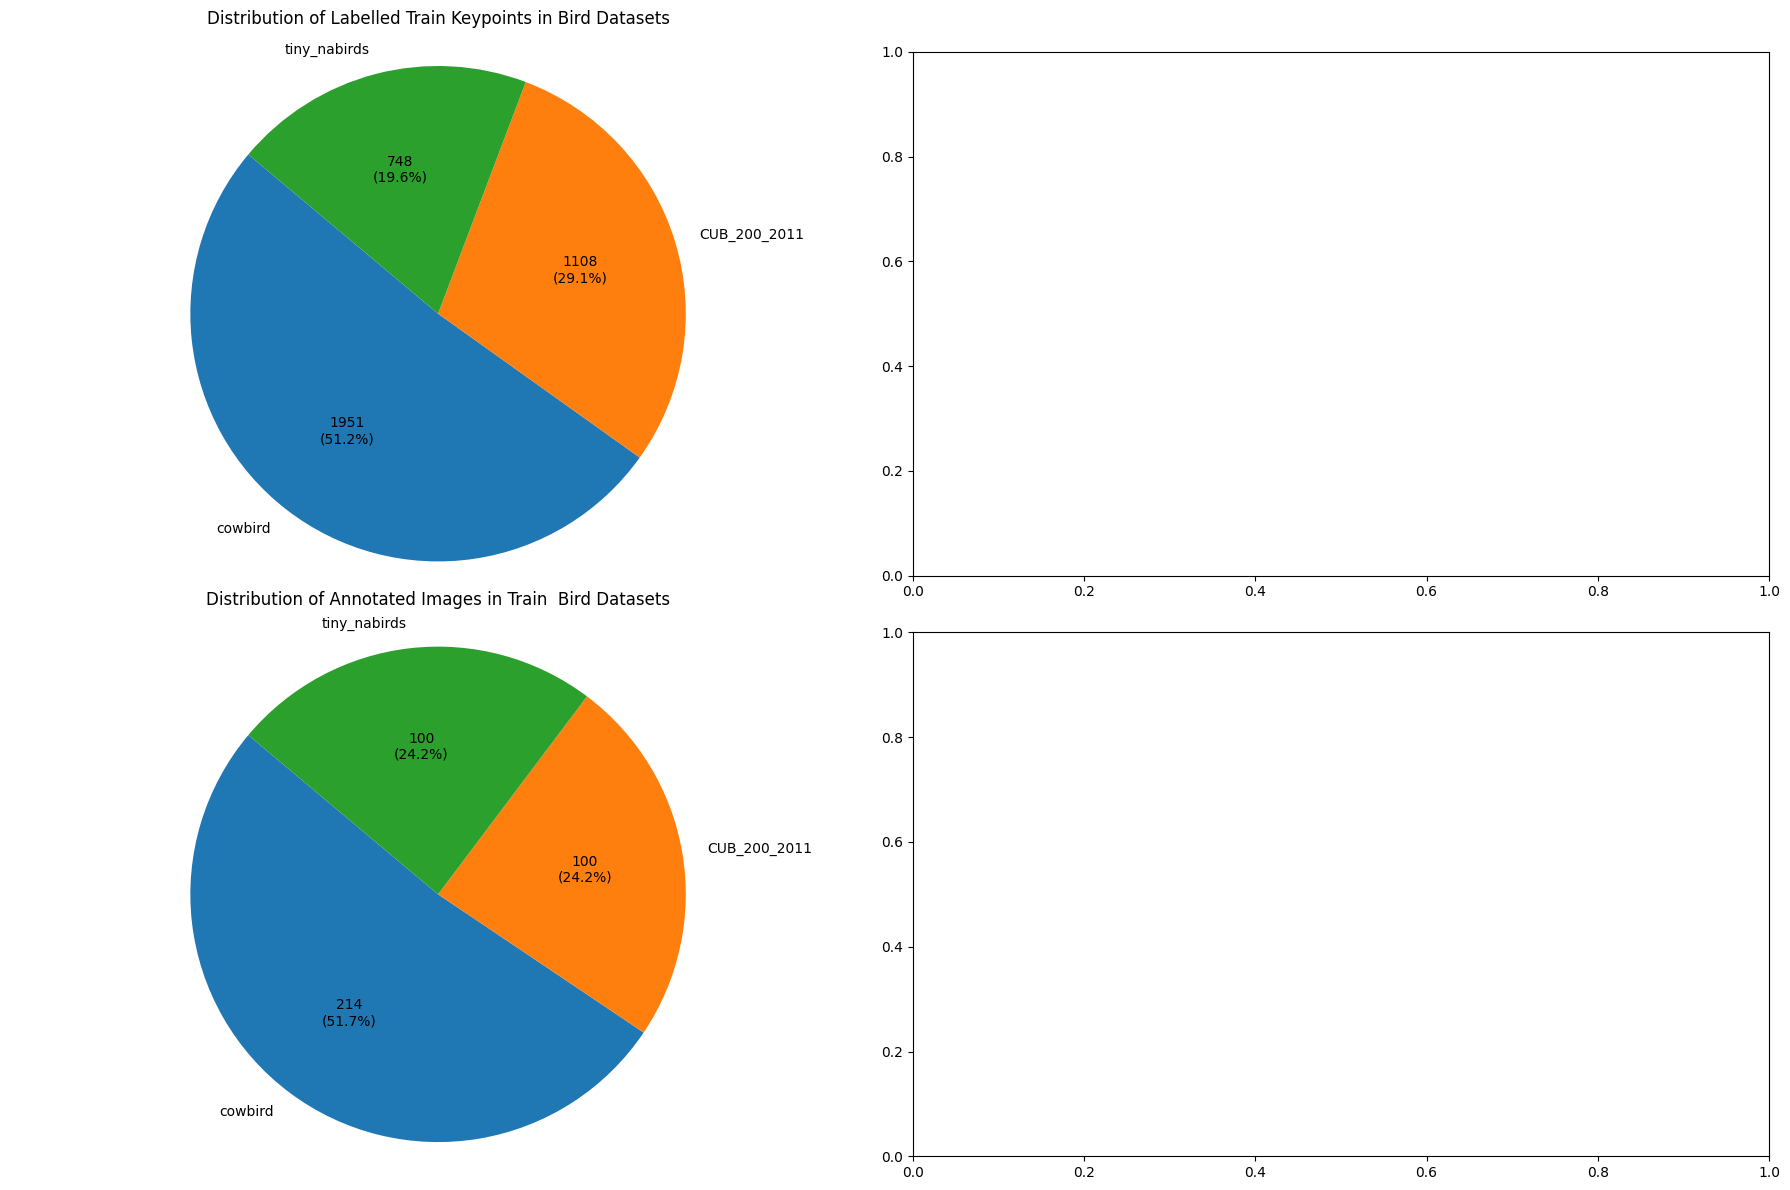

In [16]:
# Plot the pie charts in a grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Adjust the spacing at the top to avoid overlap
fig.subplots_adjust(top=0.85)

# Train keypoints pie chart
axs[0, 0].pie(train_keypoints_sizes, labels=train_keypoints_labels, autopct=autopct_format(train_keypoints_sizes), startangle=140, textprops={'fontsize': 10})
axs[0, 0].axis('equal')
axs[0, 0].set_title('Distribution of Labelled Train Keypoints in Bird Datasets', pad=20)

# Train annotations pie chart
axs[1, 0].pie(train_annotations_sizes, labels=train_annotations_labels, autopct=autopct_format(train_annotations_sizes), startangle=140, textprops={'fontsize': 10})
axs[1, 0].axis('equal')
axs[1, 0].set_title('Distribution of Annotated Images in Train  Bird Datasets', pad=20)

plt.tight_layout()
plt.show()

# Task2

In [17]:
train_proportions_by_dataset = extract_bbox_proportions(train_data)
test_proportions_by_dataset = extract_bbox_proportions(test_data)
train_annotations_by_dataset, test_proportions_by_dataset

({'cowbird': 214, 'CUB_200_2011': 100, 'tiny_nabirds': 100},
 {'cowbird': [0.1351875,
   0.0027604166666666667,
   0.0018402777777777777,
   0.00140625,
   0.006453125,
   0.0025520833333333333,
   0.0014557291666666666,
   0.0021614583333333334,
   0.0010546875,
   0.01597222222222222,
   0.0039565972222222225,
   0.0022335069444444446,
   0.00418359375,
   0.0011571180555555555,
   0.00107421875,
   0.0010208333333333332,
   0.0012083333333333334,
   0.0034366319444444444,
   0.00253125,
   0.002595486111111111,
   0.0024973958333333332,
   0.0010625,
   0.0008203125,
   0.0030833333333333333,
   0.0021571180555555554,
   0.0010177951388888888,
   0.0011579861111111112,
   0.00053125,
   0.0011041666666666667,
   0.0008585069444444444,
   0.0005785590277777778,
   0.0006458333333333333,
   0.004359375,
   0.015703125,
   0.025309027777777778,
   0.016430555555555556,
   0.0011401909722222221,
   0.0018611111111111111,
   0.0018059895833333333,
   0.0005034722222222222,
   0.001150173

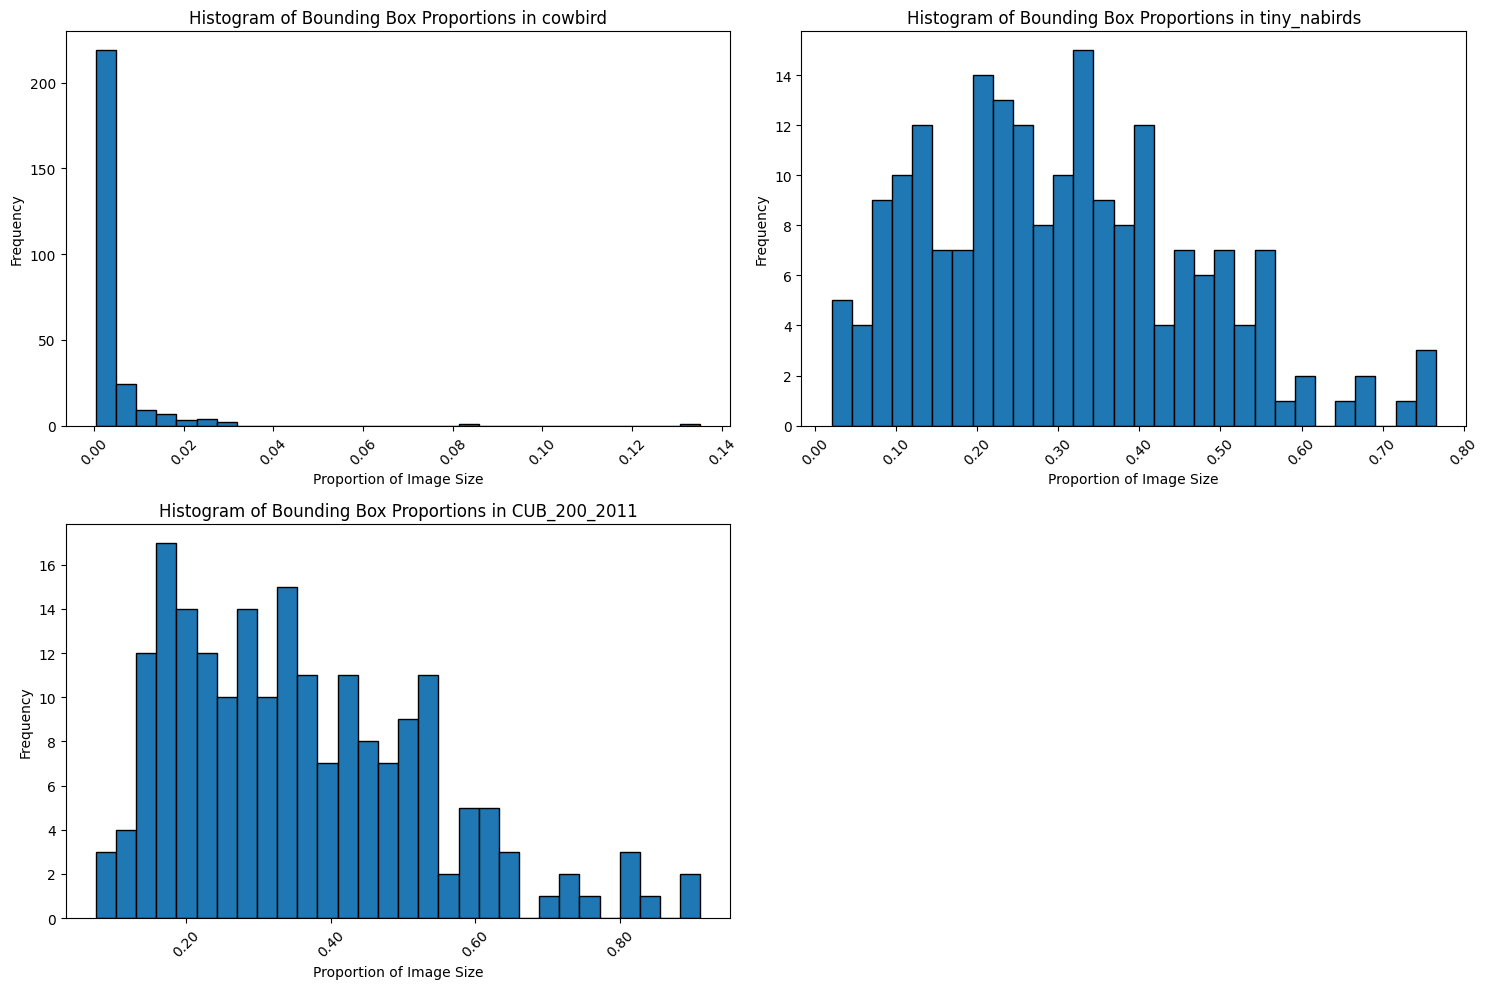

In [18]:
# Combine train and test proportions
combined_proportions_by_dataset = {}
for dataset in set(train_proportions_by_dataset.keys()).union(test_proportions_by_dataset.keys()):
    combined_proportions_by_dataset[dataset] = train_proportions_by_dataset.get(dataset, []) + test_proportions_by_dataset.get(dataset, [])


# Plot histograms for each dataset in a grid-like format
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, (dataset, proportions) in zip(axes, combined_proportions_by_dataset.items()):
    ax.hist(proportions, bins=30, edgecolor='black')
    ax.set_title(f'Histogram of Bounding Box Proportions in {dataset}')
    ax.set_xlabel('Proportion of Image Size')
    ax.set_ylabel('Frequency')
    ax.ticklabel_format(style='plain', axis='x')  # Disable scientific notation on x-axis
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))
    plt.setp(ax.get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(combined_proportions_by_dataset), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [19]:
train_sum_proportions_by_dataset = sum_bbox_proportions(train_data)
test_sum_proportions_by_dataset = sum_bbox_proportions(test_data)
train_sum_proportions_by_dataset, test_sum_proportions_by_dataset

({'cowbird': [0.026053819444444445,
   0.031635850694444446,
   0.0078203125,
   0.035293836805555555,
   0.005299045138888889,
   0.030315538194444446,
   0.174546875,
   0.08124913194444444,
   0.0012100694444444444,
   0.00213671875,
   0.0683689236111111,
   0.0017708333333333332,
   0.0068203125,
   0.041153645833333335,
   0.0035703125,
   0.024312065972222224,
   0.09801041666666667,
   0.004526909722222222,
   0.02383420138888889,
   0.006291232638888889,
   0.006950520833333334,
   0.008462239583333333,
   0.0009930555555555556,
   0.0031280381944444446,
   0.026740451388888888,
   0.023647569444444443,
   0.005810763888888889,
   0.014989149305555555,
   0.046061197916666664,
   0.05891623263888889,
   0.025917534722222222],
  'CUB_200_2011': [0.9112511671335201,
   0.5057785234899329,
   0.12734328358208954,
   0.15992638036809817,
   0.5301141141141141,
   0.5301017811704835,
   0.45617,
   0.3318290504328707,
   0.5322314049586777,
   0.3817790055248619,
   0.1577688442211

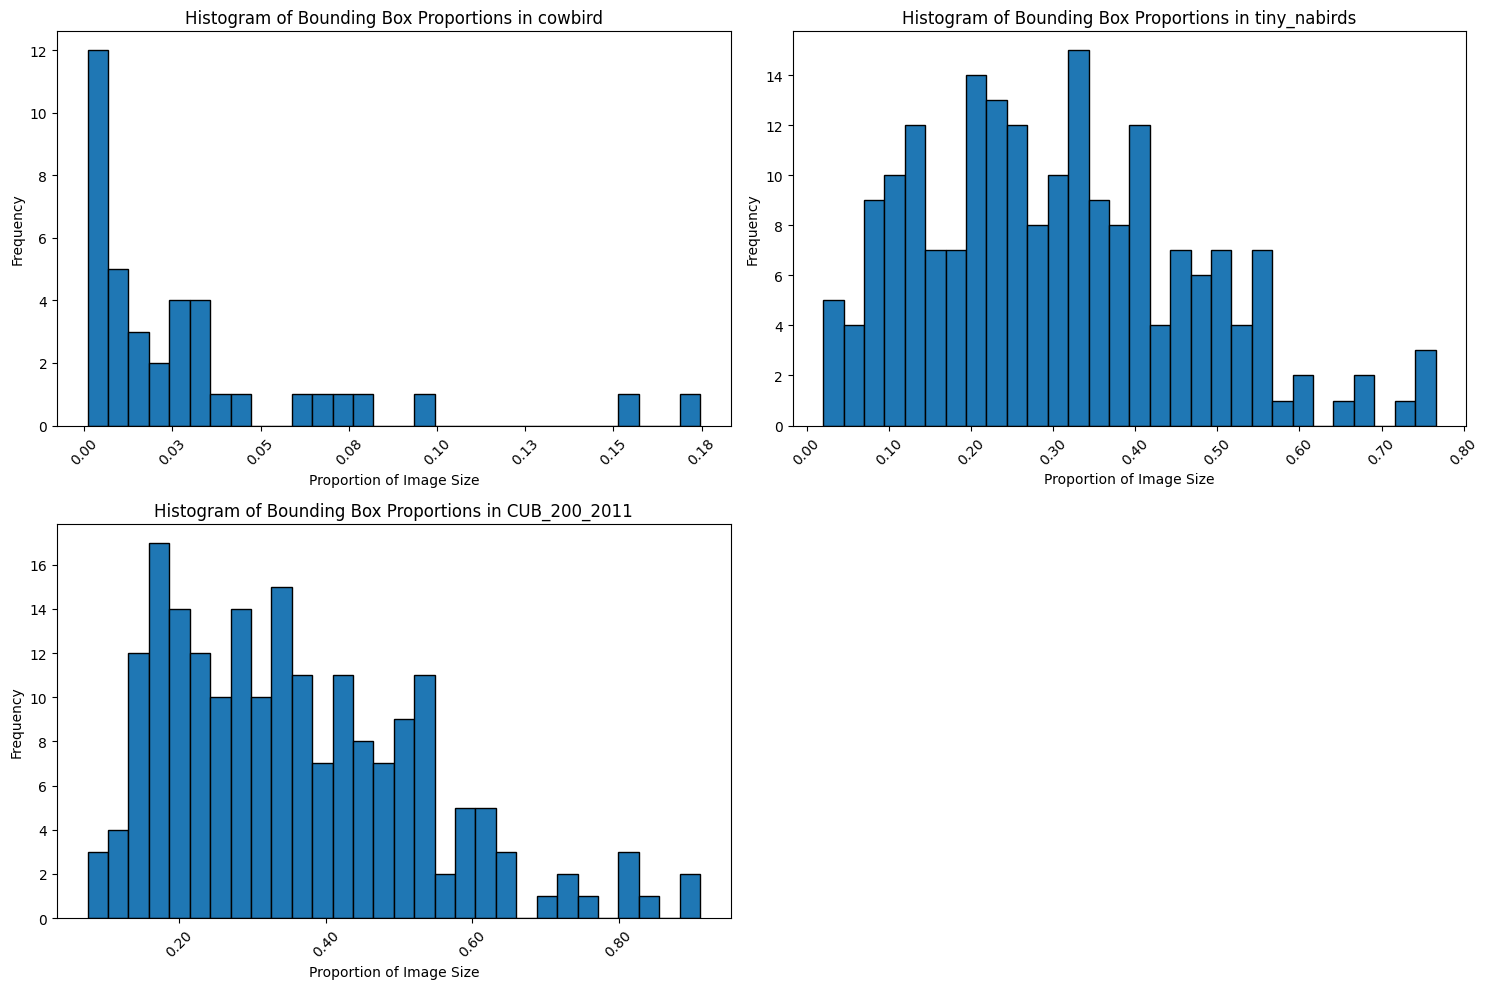

In [20]:
# Combine train and test proportions
combined_sum_proportions_by_dataset = {}
for dataset in set(train_sum_proportions_by_dataset.keys()).union(test_sum_proportions_by_dataset.keys()):
    combined_sum_proportions_by_dataset[dataset] = train_sum_proportions_by_dataset.get(dataset, []) + test_sum_proportions_by_dataset.get(dataset, [])


# Plot histograms for each dataset in a grid-like format
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, (dataset, proportions) in zip(axes, combined_sum_proportions_by_dataset.items()):
    ax.hist(proportions, bins=30, edgecolor='black')
    ax.set_title(f'Histogram of Bounding Box Proportions in {dataset}')
    ax.set_xlabel('Proportion of Image Size')
    ax.set_ylabel('Frequency')
    ax.ticklabel_format(style='plain', axis='x')  # Disable scientific notation on x-axis
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))
    plt.setp(ax.get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(combined_sum_proportions_by_dataset), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Task 3

<Axes: xlabel='Width', ylabel='Height'>

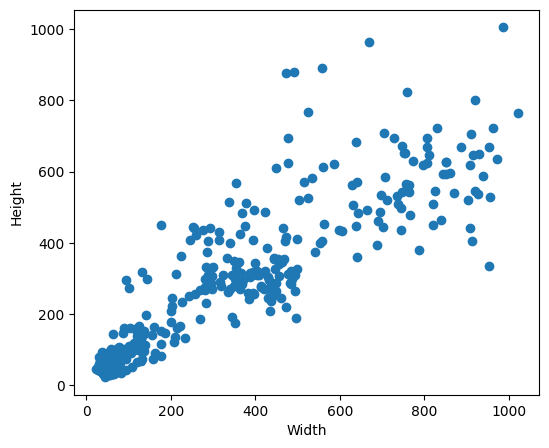

In [21]:
bbox_widths, bbox_heights = calculate_width_height(train_data)
plot_width_height(bbox_widths, bbox_heights)

<Axes: xlabel='Area (width * height)', ylabel='Frequency'>

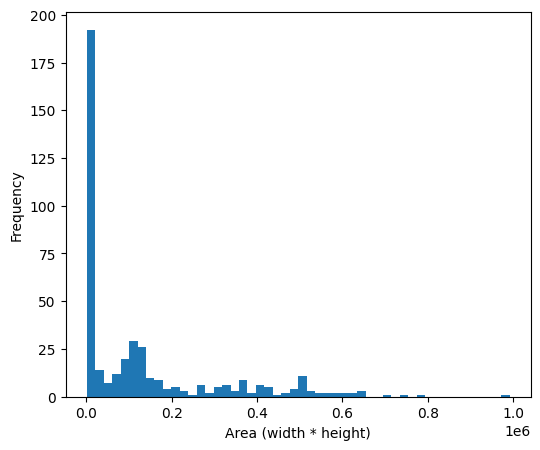

In [22]:
bbox_area = calculate_area(bbox_widths, bbox_heights)
plot_area(bbox_area)

<Axes: xlabel='Ratio (width / height)', ylabel='Frequency'>

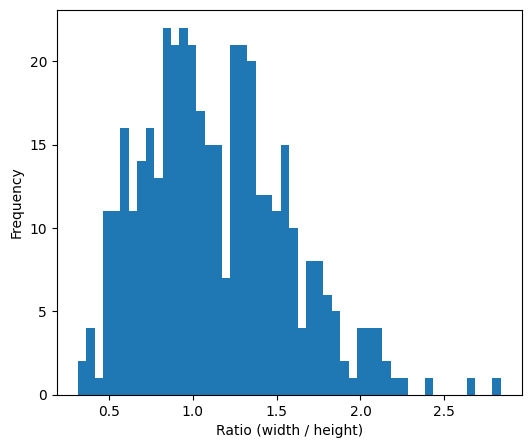

In [23]:
bbox_ratio = calculate_ratio(bbox_widths, bbox_heights)
plot_ratio(bbox_ratio)

AttributeError: 'Axes' object has no attribute 'gca'

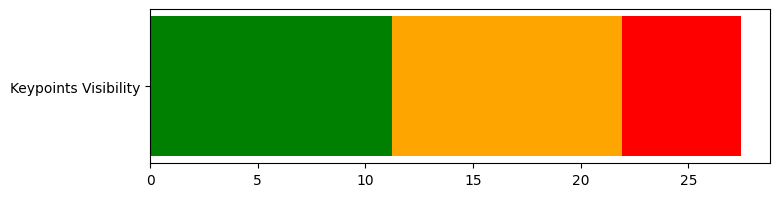

In [24]:
percent_visible, percent_occluded, percent_unlabeled = compute_keypoints(train_data)
plot_keypoint_percent(percent_visible, percent_occluded, percent_unlabeled)

# Task 5

In [25]:
all_keypoints = get_all_keypoints(train_data)  # load all keypoint annotations
parsed_poses = keypoint2pose(all_keypoints)  # parse keypoint annotations into (x, y, visibility) triples
parsed_poses.shape

(414, 126)

In [27]:
poses_df = pd.DataFrame(parsed_poses)
poses_df

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.0,0.0,0.0,160.0,358.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,257.0,328.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,391.0,325.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,426.0,332.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,364.0,410.0,0.0,139.0,186.0,0.0,357.0,639.0,0.0,293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,437.0,208.0,0.0,657.0,210.0,0.0,422.0,408.0,0.0,526.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,0.0,0.0,0.0,305.0,156.0,0.0,238.0,182.0,0.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,514.0,304.0,0.0,328.0,271.0,0.0,538.0,415.0,0.0,435.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# drop all zero features: keypoints that are never annotated
poses_df = poses_df.loc[:, (poses_df != 0).any(axis=0)]
poses_df

,0,1,3,4,5,6,7,9,10,12,...,49,51,52,53,69,70,71,72,73,74
0,0.0,0.0,160.0,358.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,168.0,364.0,2.0,168.0,399.0,2.0,182.0,399.0,2.0
1,0.0,0.0,257.0,328.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,271.0,339.0,2.0,279.0,387.0,2.0,289.0,389.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,353.0,334.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,391.0,325.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,375.0,367.0,2.0,367.0,364.0,2.0
4,0.0,0.0,426.0,332.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,420.0,337.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,364.0,410.0,139.0,186.0,0.0,357.0,639.0,293.0,469.0,290.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,437.0,208.0,657.0,210.0,0.0,422.0,408.0,526.0,333.0,553.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,0.0,0.0,305.0,156.0,0.0,238.0,182.0,266.0,158.0,293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,514.0,304.0,328.0,271.0,0.0,538.0,415.0,435.0,382.0,429.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


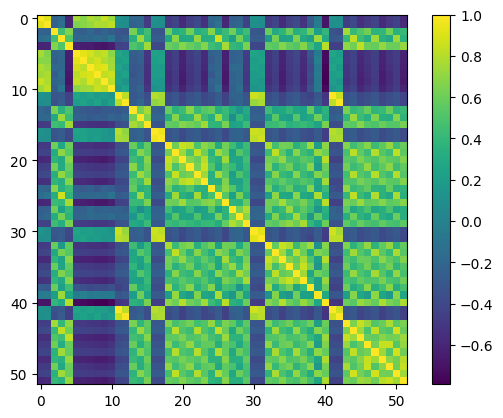

In [30]:
# compute correlation between remaining features
corr = np.corrcoef(poses_df.T)
plt.imshow(corr)
plt.colorbar()

### PCA

In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(poses_df)

In [32]:
pca_3d = PCA(n_components=3)
pca_2d = PCA(n_components=2)

p_comp_2d = pca_2d.fit_transform(scaled_features)
p_comp_3d = pca_3d.fit_transform(scaled_features)

p_comp_2d.shape, p_comp_3d.shape

((414, 2), (414, 3))

### KMeans clustering

#### Kmeans on 2d features

##### Deciding on number of clusters: elbow method

In [34]:
sse = [] # sum of squared error within clusters
for k in range(1, 15):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=50, random_state=42)
    # run Kmeans algo
    kmeans.fit(p_comp_2d)
    sse.append(kmeans.inertia_)

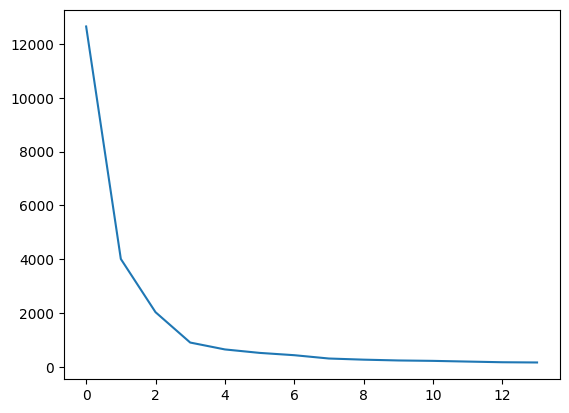

In [35]:
plt.plot(sse)

In [36]:
from kneed import KneeLocator

opt_clusters = KneeLocator(range(1,15), sse, curve="convex", direction="decreasing")
f"Optimal number of clusters: {opt_clusters.knee}"

'Optimal number of clusters: 4'

In [37]:
kmeans = KMeans(init="random", n_clusters=opt_clusters.knee, n_init=10, max_iter=50, random_state=42)
# run Kmeans algo
kmeans.fit(p_comp_2d)

predicted_labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [38]:
# Construct dataframe from predicted clusters
predicted_clusters = to_df(p_comp_2d, predicted_labels)
predicted_clusters

,0,1,label
3,-0.006787,0.560821,3
3,2.449607,0.411817,3
3,-0.402650,0.643910,3
3,1.341815,0.619687,3
3,0.271036,0.516926,3
...,...,...,...
1,-4.467823,-4.027202,1
1,-4.408312,-3.744752,1
1,-3.339419,-1.204283,1
1,-4.626191,-4.027216,1


Text(0.5, 1.0, 'Train keypoints: 4 clusters')

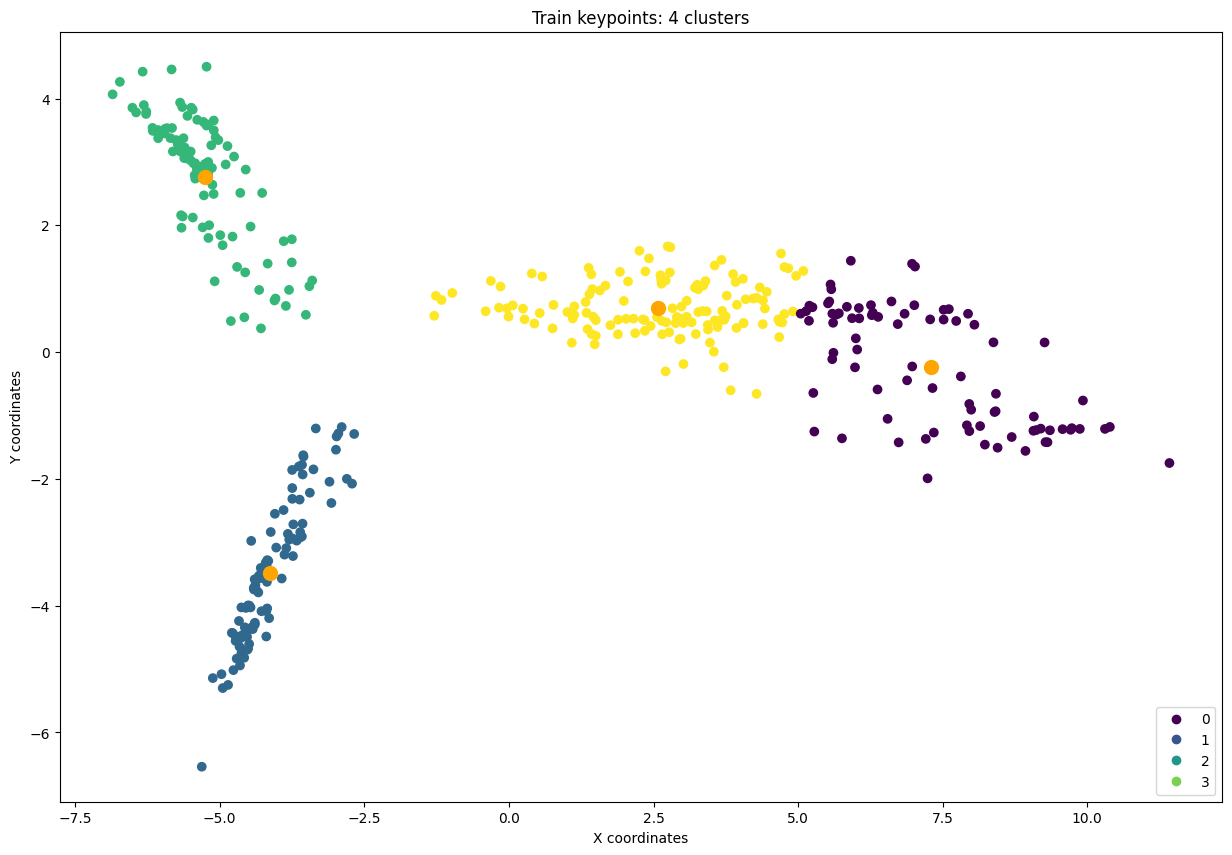

In [39]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(predicted_clusters[0], predicted_clusters[1], c=predicted_clusters["label"])
scatter2 = plt.scatter(centers[:, 0], centers[:, 1], c="orange", s=100)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")

unique_labels = np.unique(predicted_clusters["label"])
handles, labels = scatter.legend_elements(prop="colors", num=len(unique_labels))
plt.legend(handles, unique_labels, loc="lower right")
plt.title(f"Train keypoints: {opt_clusters.knee} clusters")

#### Kmeans on 3d features

In [40]:
sse = [] # sum of squared error within clusters
for k in range(1, 15):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=50, random_state=42)
    # run Kmeans algo
    kmeans.fit(p_comp_3d)
    sse.append(kmeans.inertia_)

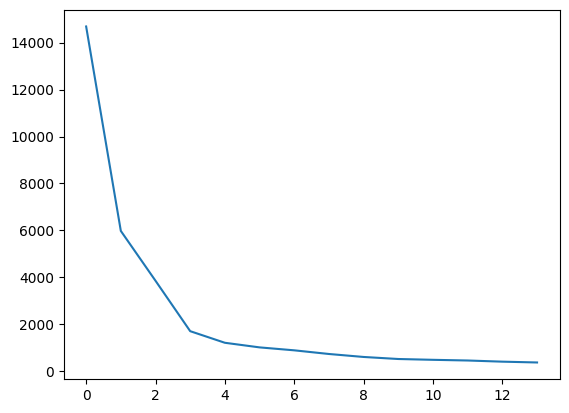

In [41]:
plt.plot(sse)

In [42]:
from kneed import KneeLocator

opt_clusters = KneeLocator(range(1,15), sse, curve="convex", direction="decreasing")
f"Optimal number of clusters: {opt_clusters.knee}"

'Optimal number of clusters: 4'

In [43]:
kmeans = KMeans(init="random", n_clusters=opt_clusters.knee, n_init=10, max_iter=50, random_state=42)
# run Kmeans algo
kmeans.fit(p_comp_3d)

predicted_labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [44]:
# Construct dataframe from predicted clusters
predicted_clusters = to_df(p_comp_3d, predicted_labels)
predicted_clusters

,0,1,2,label
3,-0.006787,0.560821,-0.939724,3
3,2.449607,0.411817,-0.268492,3
3,-0.402650,0.643910,-1.652101,3
3,1.341815,0.619687,-1.302087,3
3,0.271036,0.516926,-1.538147,3
...,...,...,...,...
1,-4.467823,-4.027202,0.194285,1
1,-4.408312,-3.744752,-0.273688,1
1,-3.339419,-1.204283,-1.303910,1
1,-4.626191,-4.027216,-0.329286,1


In [45]:
import plotly.express as px

fig = px.scatter_3d(predicted_clusters, x=0, y=1, z=2, color='label')
fig.show()